# <center><font color='#008d8e'>Skin Care Recommendation System</font></center>

# Thêm thư viện

In [5]:
# !pip install nltk


In [6]:
# import nltk


In [7]:
# !pip install markovify

In [8]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# CountVectorizer+tfidfTransformer = tfidfVectorizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show,curdoc,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,Select,Paragraph,TextInput
from ipywidgets import interact

import markovify
import string
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LPL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LPL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LPL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from sklearn.metrics import classification_report

# Hiển thị sản phẩm

In [10]:
df=pd.read_csv('data/skindataall.csv',index_col=[0])

In [11]:
df.head(10)

Username  Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0          allyp3     Medium  Combination     Brown   Brunette             5   
1          PatTea     Medium  Combination     Brown        Red             1   
2        Sabi1991    No data      No data   No data    No data             5   
3      happyface2       Fair          Dry      Blue     Blonde             5   
4        kimkix34       Fair       Normal     Green     Blonde             5   
5         TABrown    No data      No data   No data    No data             2   
6        britcorm  Porcelain         Oily      Blue   Brunette             1   
7         jenn887        Tan          Dry     Brown      Black             5   
8    kimmydoodles       Fair  Combination     Hazel   Brunette             5   
9  taylorashudson      Light  Combination      Blue     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   
5  There is nothing great about this cleanser. I ...   
6  Been trying this cleanser for about 3 weeks no...   
7  loveeeeeee this cleanser. Leaves my skin smoot...   
8  Like the fact that you do not need to use a lo...   
9  I like it so far! Doesn’t feel stripping and s...   

                          Product                Brand  Price  ...  Oily  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
5  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
6  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
7  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
8  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
9  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   

  Sensitive  Category                                        Product_Url  \
0         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
1         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
2         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
3         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
4         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
5         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
6         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
7         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
8         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
9         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   

   User_id  Product_id                                Ingredients_Cleaned  \
0     3420         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
1     2483         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
2     2715         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
3     4497         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
4     5017         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
5     3008         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
6     3776         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
7     4742         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
8     5021         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
9     6594         157  ['sodium', 'cocoyl', 'glutamate', 'cocamido

In [12]:
df.tail()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
8698  Tinkfairy      Fair  Combination     Hazel   Brunette             5   
8699   baeyonce     Light  Combination      Blue     Blonde             5   
8700     JustJC      Dark  Combination     Brown      Black             5   
8701    Latchmi   No data      No data   No data    No data             5   
8702     xc1148   No data      No data   No data    No data             5   

                                                 Review  \
8698  I was looking for a overnight serum with retin...   
8699  I have never experienced such fast results in ...   
8700  Holy grail product for me! Everyone can tell w...   
8701  I love this product very much. Very much ! Exp...   
8702  I have tried a million creams and treatments f...   

                                                Product  \
8698  Ferulic + Retinol Wrinkle Recovery Overnight S...   
8699  Ferulic + Retinol Wrinkle Recovery Overnight S...   
8700  Ferulic + Retinol Wrinkle Recovery Overnight S...   
8701  Ferulic + Retinol Wrinkle Recovery Overnight S...   
8702  Ferulic + Retinol Wrinkle Recovery Overnight S...   

                          Brand  Price  ...  Oily Sensitive     Category  \
8698  DR. DENNIS GROSS SKINCARE     88  ...     1         1  Moisturizer   
8699  DR. DENNIS GROSS SKINCARE     88  ...     1         1  Moisturizer   
8700  DR. DENNIS GROSS SKINCARE     88  ...     1         1  Moisturizer   
8701  DR. DENNIS GROSS SKINCARE     88  ...     1         1  Moisturizer   
8702  DR. DENNIS GROSS SKINCARE     88  ...     1         1  Moisturizer   

                                            Product_Url  User_id  Product_id  \
8698  https://www.sephora.com/product/ferulic-retino...     3127         124   
8699  https://www.sephora.com/product/ferulic-retino...     3616         124   
8700  https://www.sephora.com/product/ferulic-retino...     1464         124   
8701  https://www.sephora.com/product/ferulic-retino...     1733         124   
8702  https://www.sephora.com/product/ferulic-retino...     6824         124   

                                    Ingredients_Cleaned  \
8698  ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...   
8699  ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...   
8700  ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...   
8701  ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...   
8702  ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...   

                                         Review_Cleaned Good_Stuff  \
8698  ['wa', 'looking', 'overnight', 'serum', 'retin...          1   
8699  ['never', 'experienced', 'fast', 'result', 'li...          1   
8700     ['holy', 'grail', 'everyone', 'tell', 'using']          1   
8701  ['love', 'much', 'much', 'expensive', 'amazing...          1   
8702  ['tried', 'million', 'cream', 'treatment', 'fa...          1   

                                              Ing_Tfidf  
8698  dicaprylyl, carbonate, niacinamide, cetyl, alc...  
8699  dicaprylyl, carbonate, niacinamide, cetyl, alc...  
8700  dicaprylyl, carbonate, niacinamide, cetyl, alc...  
8701  dicaprylyl, carbonate, niacinamide, cetyl, alc...  
8702  dicaprylyl, carbonate, niacinamide, cetyl, alc...  

[5 rows x 25 columns]

* Phân bố người dùng theo tông da, xem tông da nào phổ biến nhất trong tập dữ liệu.

<Axes: xlabel='Skin_Tone'>

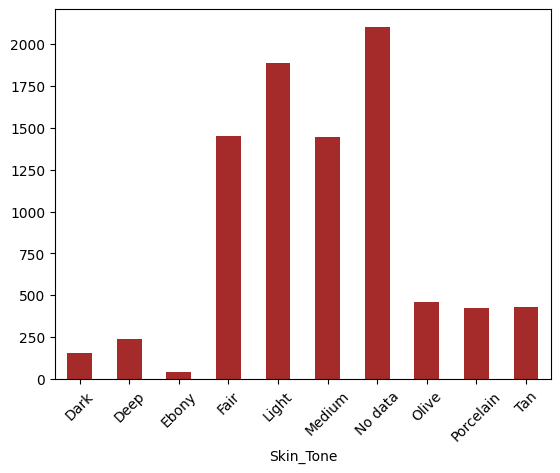

In [13]:
skintone_stats=df.groupby('Skin_Tone')['Username'].count()
skintone_stats.plot.bar(color='brown',rot=45)

Tông màu da phổ biến nhất: No data — cho thấy nhiều người dùng không cung cấp thông tin về tông da (hơn 2000 người).

Các tông phổ biến khác:

Light: gần 1900 người.

Fair và Medium: khoảng 1400 người mỗi nhóm.

Tông ít phổ biến:

Ebony, Deep, Dark: ít người hơn nhiều (dưới 300 người).

Các tông như Olive, Porcelain, Tan: số lượng xấp xỉ 400–450 người.

In [14]:
skintype_stats=df.groupby('Skin_Type')['Username'].count()

<Axes: xlabel='Skin_Type'>

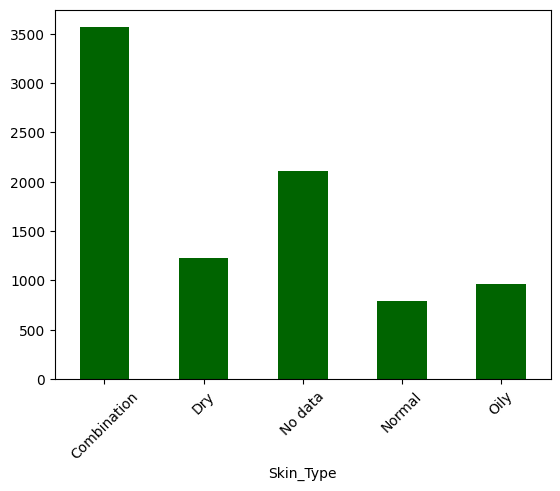

In [15]:
skintype_stats.plot.bar(color='darkgreen',rot=45)

In [16]:
eyecolor_stats=df.groupby('Eye_Color')['Username'].count()

<Axes: xlabel='Eye_Color'>

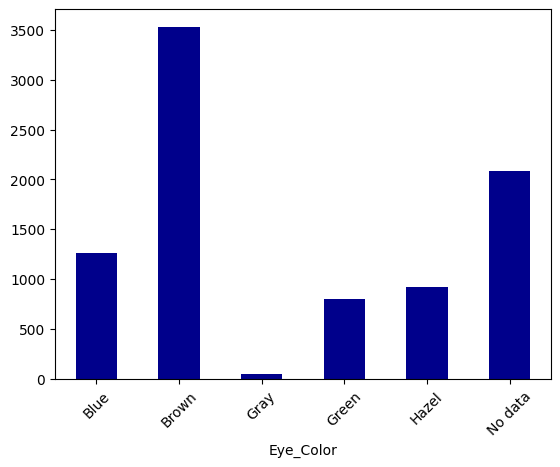

In [17]:
eyecolor_stats.plot.bar(color='darkblue',rot=45)

In [18]:
haircolor_stats=df.groupby('Hair_Color')['Username'].count()

<Axes: xlabel='Hair_Color'>

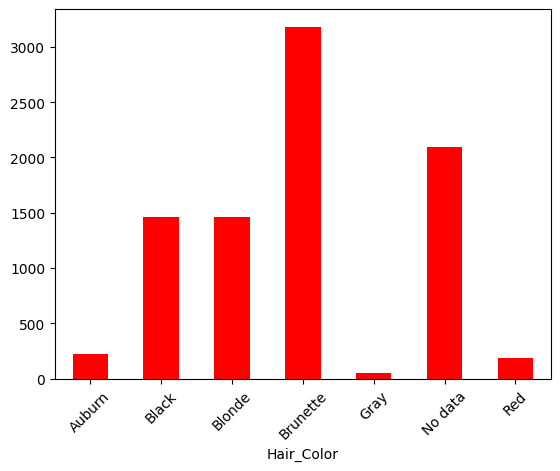

In [19]:
haircolor_stats.plot.bar(color='red',rot=45)

<Axes: xlabel='Rating_Stars'>

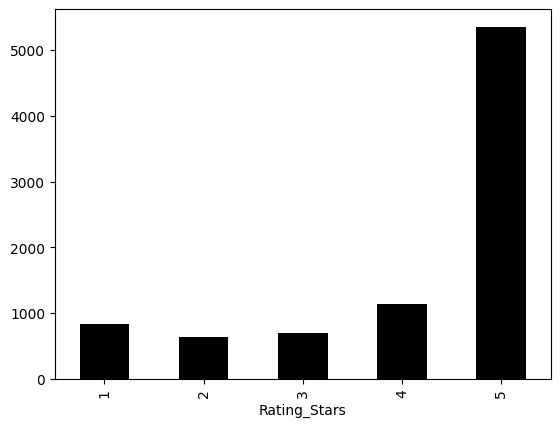

In [20]:
rating_stats = df.groupby('Rating_Stars')['Username'].count()
rating_stats.plot.bar(color = 'black')

In [21]:
import markovify
import string

re.sub('[^\w\s]', '', string) là một biểu thức chính quy:

[^\w\s] nghĩa là bất kỳ ký tự nào không phải là:

\w: chữ cái hoặc số (a-z, A-Z, 0-9, và dấu gạch dưới _)

\s: khoảng trắng (space, tab, newline)

Những ký tự này sẽ bị thay thế bằng chuỗi rỗng '' → tức là xóa đi.

=> Tóm lại, hàm này xóa hết các dấu câu, ký tự đặc biệt, biểu tượng... ra khỏi một đoạn văn bản.

In [22]:
def no_punc(string):
    no_punc_string=re.sub('[^\w\s]','',string)
    return no_punc_string

In [23]:
df['Review']=df.apply(lambda row: no_punc(row['Review']),axis=1)

In [24]:
df['Review'].head()

0    This is hands down the best cleanser Ive ever ...
1    Unfortunately this doesnt work for everyone I ...
2    My favorite cleanser i love the packaging on t...
3    I love all things Youth To The People This cle...
4    I had a trial size of this and was obsessed My...
Name: Review, dtype: object

In [25]:
text_model=markovify.NewlineText(df.Review,state_size=2)

In [26]:
for i in range(10):
    print(text_model.make_sentence(),'\n\n')

This Toner is amazing It feels so soft A little product would live up to Montana cold 1010 in my skin looks healthier rejuvenated smoother and more moisturized suppleplump calmed and less foundation on after my skin was sooooo soft and brighter when I use this three times per week and I have SUPER sensitive acne prone combo skin and inflamed I gave it 4 stars but the benefits I love that it is the price I could never get flakey dry skin in the way it works that great either Great for oily skin and it makes my skin I could tell that my skin I get going about my skin until you finish this off and doesnt deprive the skin whereas a fash wash and I have finally found a product I was surprised by how much is applied I also wasnt impressed I received it and it can be a staple in my skin a squeaky clean which is near impossible to get off all makeup and then again after my serum and a little adult acne for years until recently when I want to buy a new bottle this should last around 6 months im

Đoạn code này dùng thư viện markovify để tạo một mô hình ngôn ngữ dựa trên các câu đánh giá trong cột Review của DataFrame.

Cụ thể:

markovify.NewlineText(df.Review, state_size=2) sẽ xây dựng mô hình Markov bậc 2, tức là mô hình sẽ học quy luật xuất hiện của các cụm 2 từ để dự đoán từ tiếp theo. Nhờ đó câu sinh ra sẽ tự nhiên hơn.

Sau đó, dòng text_model.make_sentence() sẽ tạo ra một câu ngẫu nhiên mới, mô phỏng theo phong cách và ngữ cảnh của các review gốc.

Cuối cùng, vòng for lặp lại 10 lần để in ra 10 câu mới.

📌 Ví dụ thực tế: Nếu dữ liệu gốc có review như:
"This cream is amazing.", "My skin feels soft and clean."
Thì câu mô phỏng có thể là:
"This cream feels soft and amazing."

→ Tức là câu mới không có thật trong dữ liệu, nhưng có cấu trúc giống như thật.

Markovify hoạt động tốt khi muốn tạo câu giả lập trong chatbot, hệ thống tự động phản hồi, hoặc mô phỏng văn phong người dùng.

state_size=1 sẽ tạo ra câu ngẫu nhiên hơn, còn state_size=2 hoặc 3 cho câu mượt hơn.

In [27]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

1. from os import path
* Dùng để thao tác với đường dẫn file (như path.exists(), path.join()) — ví dụ để kiểm tra xem ảnh nền cho Word Cloud có tồn tại không.

* Trong ngữ cảnh WordCloud, thường dùng để lấy đúng đường dẫn đến ảnh nền hoặc dữ liệu văn bản.

2. from PIL import Image
* PIL là Python Imaging Library, thư viện mạnh để xử lý ảnh.

* Dòng này cho phép bạn dùng Image.open(...) để mở ảnh làm mặt nạ (mask) cho WordCloud.

* Nhờ đó bạn có thể tạo Word Cloud theo hình dạng bất kỳ (mặt người, trái tim, hình logo...).

3. from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
* WordCloud: lớp chính dùng để tạo ra biểu đồ đám mây từ.

* STOPWORDS: tập hợp các từ không mang nhiều ý nghĩa (như: the, is, a, an,...) sẽ bị loại bỏ khi tạo WordCloud.

* ImageColorGenerator: giúp WordCloud lấy màu sắc dựa trên một ảnh đầu vào — để các từ có màu sắc giống như ảnh nền.

In [28]:
negativedf=df[df.Rating_Stars<4]

In [29]:
negativedf.head()

Username  Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
1     PatTea     Medium  Combination     Brown        Red             1   
5    TABrown    No data      No data   No data    No data             2   
6   britcorm  Porcelain         Oily      Blue   Brunette             1   
20   Vani241      Olive         Oily     Brown      Black             3   
25    PatTea     Medium  Combination     Brown        Red             1   

                                               Review  \
1   Unfortunately this doesnt work for everyone I ...   
5   There is nothing great about this cleanser I g...   
6   Been trying this cleanser for about 3 weeks no...   
20  There are Pros and Cons to this cleanser This ...   
25  Unfortunately this doesnt work for everyone I ...   

                           Product                Brand  Price  ...  Oily  \
1   Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
5   Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
6   Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
20  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
25  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   

   Sensitive  Category                                        Product_Url  \
1          0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
5          0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
6          0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
20         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
25         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   

    User_id  Product_id                                Ingredients_Cleaned  \
1      2483         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
5      3008         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
6      3776         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
20     3210         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
25     2483         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   

                                       Review_Cleaned Good_Stuff  \
1   ['unfortunately', 'work', 'everyone', 'used', ...          0   
5   ['nothing', 'great', 'cleanser', 'got', 'small...          0   
6   ['trying', 'cleanser', 'week', 'glad', 'bought...          0   
20  ['pro', 'con', 'cleanser', 'cleaner', 'believe...          0   
25  ['unfortunately', 'work', 'everyone', 'used', ...          0   

                                            Ing_Tfidf  
1   sodium, cocoyl, glutamate, cocamidopropyl, bet...  
5   sodium, cocoyl, glutamate, cocamidopropyl, bet...  
6   sodium, cocoyl, glutamate, cocamidopropyl, bet...  
20  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
25  sodium, cocoyl, glutamate, cocamidopropyl, bet...  

[5 rows x 25 columns]

In [30]:
positvedf=df[df.Rating_Stars>=4]

In [31]:
positvedf.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   
7     jenn887       Tan          Dry     Brown      Black             5   

                                              Review  \
0  This is hands down the best cleanser Ive ever ...   
2  My favorite cleanser i love the packaging on t...   
3  I love all things Youth To The People This cle...   
4  I had a trial size of this and was obsessed My...   
7  loveeeeeee this cleanser Leaves my skin smooth...   

                          Product                Brand  Price  ...  Oily  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
7  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   

  Sensitive  Category                                        Product_Url  \
0         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
2         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
3         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
4         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
7         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   

   User_id  Product_id                                Ingredients_Cleaned  \
0     3420         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
2     2715         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
3     4497         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
4     5017         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
7     4742         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   

                                      Review_Cleaned Good_Stuff  \
0  ['hand', 'best', 'cleanser', 'ever', 'used', '...          1   
2  ['favorite', 'cleanser', 'love', 'packaging', ...          1   
3  ['love', 'thing', 'youth', 'people', 'cleanser...          1   
4  ['trial', 'size', 'wa', 'obsessed', 'skin', 'f...          1   
7  ['loveeeeeee', 'cleanser', 'leaf', 'skin', 'sm...          1   

                                           Ing_Tfidf  
0  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
2  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
3  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
4  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
7  sodium, cocoyl, glutamate, cocamidopropyl, bet...  

[5 rows x 25 columns]

Lấy toàn bộ các dòng đánh giá trong hai DataFrame negativedf và positvedf, rồi nối lại thành 1 chuỗi văn bản dài. Mục đích là chuẩn bị dữ liệu đầu vào cho Word Cloud.

Đoạn code này dùng để tạo Word Cloud — biểu đồ hiển thị trực quan các từ xuất hiện nhiều trong các đánh giá sản phẩm.
Em đã gộp toàn bộ review thành một chuỗi văn bản, loại bỏ các từ dừng, và thêm một vài từ không cần thiết khác.
Sau đó em viết một hàm để vẽ Word Cloud bằng thư viện wordcloud và matplotlib.

In [32]:
negative=" ".join(review for review in negativedf.Review)

In [33]:
negative

'Unfortunately this doesnt work for everyone I used it once and woke up the nxt day with 5 pimples used it again and again and again but woke up with more and more Finally i couldnt take it anymore I stopped using it went back to my cerave hydrating cleanser and Bam My skin was clearing up every day after that I suggest getting the small bottle to try it out first Remember everyones skin is very different\nread more There is nothing great about this cleanser I got the small size bottle to try out and would certainly never spend my money to buy this It did remove my makeup so this got 2 stars instead of one but it did nothing for my skin In fact I had some uneven texture after using this for a while There are much better cleansers out there Been trying this cleanser for about 3 weeks now and its not for me Im so glad I only bought the small bottle as this product broke me out Its the only new product in my routine so I know it is this one causing the break outs I also just didnt feel as

In [34]:
positive=" ".join(review for review in positvedf.Review)

In [35]:
positive

'This is hands down the best cleanser Ive ever used I originally got it in the mini bottle at checkout on a whim and was shocked by how much it cleared my skin up I bought the big bottle and havent looked back since now this is the only cleanser Ill use I used to get little pimples all over my forehead and ever since I started using this a year ago they went away and havent returned While I cant speak for everyones skin this was a miracle product for clearing my complexion and soothes my facial redness each time I use it Im in love\nread more My favorite cleanser i love the packaging on this even tho my first bottle slipped out of my hands lol I love all things Youth To The People This cleanser smells fresh and light the ingredients are fantastic and they are crueltyfree A quick google search of any brand will tell you if theyre actually crueltyfree dont just trust what a company says on its site there are very loose rules about a company being able to claim theyre CF on their marketin

STOPWORDS là bộ từ dừng mặc định, chứa các từ phổ biến như "the", "and", "is"...

Chuyển nó thành set để tăng hiệu suất khi lọc từ.

Sau đó thêm vào một số từ dư thừa trong bối cảnh dữ liệu cụ thể như "read", "more", "product" — vì đây là các từ xuất hiện nhiều nhưng không mang ý nghĩa đặc trưng trong đánh giá.

In [36]:
stopwords=set(STOPWORDS)

In [37]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [38]:
stopwords.update(['read','more','product'])

Xem kích thước stopwords Để kiểm tra xem việc cập nhật từ dừng có thành công không.

In [39]:
len(set(STOPWORDS)) # số lượng ban đầu

192

In [40]:
len(stopwords) # sau khi thêm từ

194

Hàm generate_wordcloud() nhận một chuỗi văn bản (dữ liệu review).

Tạo một biểu đồ Word Cloud bằng cách bỏ qua các stopwords, và hiển thị bằng matplotlib.

interpolation='bilinear' giúp hình ảnh mịn hơn.

plt.axis('off') ẩn trục để biểu đồ đẹp hơn.

In [41]:
def generate_wordcloud(data):
    wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(data)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

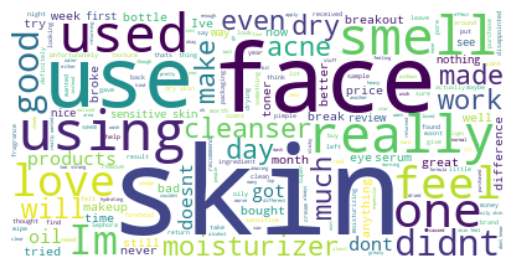

In [42]:
generate_wordcloud(negative)

Đây là biểu đồ Word Cloud thể hiện tần suất xuất hiện của các từ trong các đánh giá tiêu cực về sản phẩm chăm sóc da.
Các từ càng lớn thì xuất hiện càng nhiều. Ví dụ ở đây có những từ như:

"skin", "face", "use", "using", "used", "really",... là các từ nổi bật. Điều này có thể cho thấy người dùng thường nói đến cảm giác sau khi sử dụng, hoặc hiệu quả trên da mặt

Nhiều từ mang cảm xúc tiêu cực như bad, breakout, dry cho thấy khách hàng không hài lòng với một số khía cạnh của sản phẩm.
Nếu nhiều người đề cập đến "smell" hoặc "dry", có thể nhóm sản phẩm này cần xem lại mùi hương và độ ẩm.


(đây là biểu đồ Word Cloud biểu diễn những từ thường xuyên được nhắc đến trong các review tiêu cực. Những từ như “smell”, “breakout”, “dry”, “bad” là biểu hiện rõ rệt của những trải nghiệm không tốt. Điều này giúp em dễ dàng xác định các vấn đề phổ biến mà người dùng gặp phải, từ đó có thể cải tiến sản phẩm hoặc đưa ra lời tư vấn phù hợp hơn cho người tiêu dùng.")

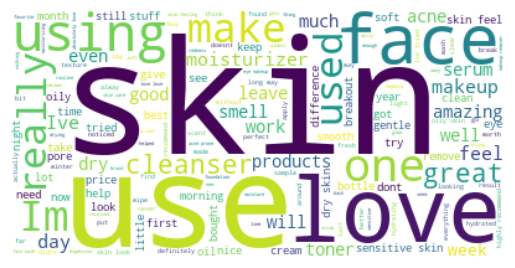

In [ ]:
generate_wordcloud(positive)

Biểu đồ Word Cloud bên trái là từ các review tích cực, còn bên phải là review tiêu cực.
Trong biểu đồ tích cực, các từ như “love”, “amazing”, “soft”, “moisturizer” cho thấy người dùng hài lòng về hiệu quả và cảm giác khi dùng sản phẩm.

Ngược lại, biểu đồ tiêu cực có các từ như “breakout”, “dry”, “bad”, “didn’t”, phản ánh những vấn đề mà người dùng gặp phải như nổi mụn, khô da, hoặc sản phẩm không hiệu quả.

Nhờ vào sự so sánh này, ta có thể phân tích điểm mạnh – điểm yếu của sản phẩm để đưa ra khuyến nghị phù hợp theo loại da và nhu cầu người dùng."

Đếm số lượng sản phẩm hoặc đánh giá thuộc từng loại (Category) trong DataFrame df.

Mục tiêu là để xem có bao nhiêu sản phẩm thuộc từng nhóm như "Cleanser", "Moisturizer", "Toner", "Serum"

In [44]:
df['Category'].value_counts()

Category
Cleanser       4117
Moisturizer    2560
Treatment      1948
Face Mask        24
Name: count, dtype: int64

Phân loại sản phẩm thành 4 nhóm chính, rồi gộp lại tất cả thành phần của từng nhóm để tạo WordCloud. Mục tiêu là để xem những thành phần nào được sử dụng nhiều nhất trong từng loại sản phẩm

In [45]:
moist_df=df[df.Category=='Moisturizer']

In [46]:
moist_df.head()

Username Skin_Tone Skin_Type Eye_Color Hair_Color  Rating_Stars  \
432        JazminLR      Deep       Dry     Brown      Black             5   
433          E12355   No data   No data   No data    No data             2   
434         lenstar       Tan    Normal     Brown      Black             2   
435  ramblinfirefox     Olive       Dry     Brown   Brunette             4   
436         KateraS     Olive    Normal     Hazel   Brunette             5   

                                                Review        Product  \
432  I love it is a must have product I use for my ...  Beauty Elixir   
433  My skin feels great but I cant bare the strong...  Beauty Elixir   
434  Really wanted to like this product but I was r...  Beauty Elixir   
435  I use this as a setting spray love the scent B...  Beauty Elixir   
436  Fresh Fresh Im a bit of a collector of face sp...  Beauty Elixir   

        Brand  Price  ...  Oily Sensitive     Category  \
432  CAUDALIE     18  ...     1         1  Moisturizer   
433  CAUDALIE     18  ...     1         1  Moisturizer   
434  CAUDALIE     18  ...     1         1  Moisturizer   
435  CAUDALIE     18  ...     1         1  Moisturizer   
436  CAUDALIE     18  ...     1         1  Moisturizer   

                                           Product_Url  User_id  Product_id  \
432  https://www.sephora.com/product/beauty-elixir-...     1309          32   
433  https://www.sephora.com/product/beauty-elixir-...      866          32   
434  https://www.sephora.com/product/beauty-elixir-...     5189          32   
435  https://www.sephora.com/product/beauty-elixir-...     6092          32   
436  https://www.sephora.com/product/beauty-elixir-...     1546          32   

                                   Ingredients_Cleaned  \
432  ['alcohol', 'citrus', 'aurantium', 'amara', 'b...   
433  ['alcohol', 'citrus', 'aurantium', 'amara', 'b...   
434  ['alcohol', 'citrus', 'aurantium', 'amara', 'b...   
435  ['alcohol', 'citrus', 'aurantium', 'amara', 'b...   
436  ['alcohol', 'citrus', 'aurantium', 'amara', 'b...   

                                        Review_Cleaned Good_Stuff  \
432  ['love', 'must', 'use', 'skin', 'care', 'also'...          1   
433  ['skin', 'feel', 'great', 'bare', 'strong', 's...          0   
434  ['really', 'wanted', 'like', 'wa', 'really', '...          0   
435  ['use', 'setting', 'spray', 'love', 'scent', '...          0   
436  ['fresh', 'fresh', 'bit', 'collector', 'face',...          1   

                                             Ing_Tfidf  
432  alcohol, citrus, aurantium, amara, bitter, ora...  
433  alcohol, citrus, aurantium, amara, bitter, ora...  
434  alcohol, citrus, aurantium, amara, bitter, ora...  
435  alcohol, citrus, aurantium, amara, bitter, ora...  
436  alcohol, citrus, aurantium, amara, bitter, ora...  

[5 rows x 25 columns]

In [47]:
cleanse_df=df[df.Category=='Cleanser']

In [48]:
cleanse_df.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser Ive ever ...   
1  Unfortunately this doesnt work for everyone I ...   
2  My favorite cleanser i love the packaging on t...   
3  I love all things Youth To The People This cle...   
4  I had a trial size of this and was obsessed My...   

                          Product                Brand  Price  ...  Oily  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   

  Sensitive  Category                                        Product_Url  \
0         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
1         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
2         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
3         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
4         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   

   User_id  Product_id                                Ingredients_Cleaned  \
0     3420         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
1     2483         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
2     2715         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
3     4497         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
4     5017         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   

                                      Review_Cleaned Good_Stuff  \
0  ['hand', 'best', 'cleanser', 'ever', 'used', '...          1   
1  ['unfortunately', 'work', 'everyone', 'used', ...          0   
2  ['favorite', 'cleanser', 'love', 'packaging', ...          1   
3  ['love', 'thing', 'youth', 'people', 'cleanser...          1   
4  ['trial', 'size', 'wa', 'obsessed', 'skin', 'f...          1   

                                           Ing_Tfidf  
0  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
1  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
2  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
3  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
4  sodium, cocoyl, glutamate, cocamidopropyl, bet...  

[5 rows x 25 columns]

In [49]:
mask_df=df[df.Category=='Face Mask']

In [50]:
mask_df.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
3072   summerstory    Medium  Combination     Brown      Black             1   
3073        Nuelle      Fair  Combination     Hazel   Brunette             4   
3074  MissQueenie1     Olive         Oily     Brown      Black             4   
3075     VivyKowal    Medium  Combination     Green     Blonde             5   
3076        NewAge       Tan  Combination     Brown   Brunette             3   

                                                 Review  \
3072  Its make my skin so dry I had to return it Its...   
3073  This cream doesnt feel heavy on the skin its r...   
3074  I have been using this product for a little bi...   
3075  I love this product I have combo skin and its ...   
3076  Feels nice on the skin and relaxing Love that ...   

                        Product    Brand  Price  ...  Oily Sensitive  \
3072  Time Freeze Sleeping Mask  LANEIGE     39  ...     1         1   
3073  Time Freeze Sleeping Mask  LANEIGE     39  ...     1         1   
3074  Time Freeze Sleeping Mask  LANEIGE     39  ...     1         1   
3075  Time Freeze Sleeping Mask  LANEIGE     39  ...     1         1   
3076  Time Freeze Sleeping Mask  LANEIGE     39  ...     1         1   

       Category                                        Product_Url  User_id  \
3072  Face Mask  https://www.sephora.com/product/time-freeze-sl...     6518   
3073  Face Mask  https://www.sephora.com/product/time-freeze-sl...     2425   
3074  Face Mask  https://www.sephora.com/product/time-freeze-sl...     2189   
3075  Face Mask  https://www.sephora.com/product/time-freeze-sl...     3234   
3076  Face Mask  https://www.sephora.com/product/time-freeze-sl...     2354   

      Product_id                                Ingredients_Cleaned  \
3072         274  ['propanediol', 'avena', 'sativa', 'oat', 'ker...   
3073         274  ['propanediol', 'avena', 'sativa', 'oat', 'ker...   
3074         274  ['propanediol', 'avena', 'sativa', 'oat', 'ker...   
3075         274  ['propanediol', 'avena', 'sativa', 'oat', 'ker...   
3076         274  ['propanediol', 'avena', 'sativa', 'oat', 'ker...   

                                         Review_Cleaned Good_Stuff  \
3072  ['make', 'skin', 'dry', 'return', 'freeze', 't...          0   
3073  ['cream', 'feel', 'heavy', 'skin', 'recommende...          0   
3074  ['using', 'little', 'bit', 'month', 'love', 'k...          0   
3075  ['love', 'combo', 'skin', 'perfectly', 'absorb...          1   
3076  ['feel', 'nice', 'skin', 'relaxing', 'love', '...          0   

                                              Ing_Tfidf  
3072  propanediol, avena, sativa, oat, kernel, extra...  
3073  propanediol, avena, sativa, oat, kernel, extra...  
3074  propanediol, avena, sativa, oat, kernel, extra...  
3075  propanediol, avena, sativa, oat, kernel, extra...  
3076  propanediol, avena, sativa, oat, kernel, extra...  

[5 rows x 25 columns]

In [51]:
treat_df=df[df.Category=='Treatment']

In [52]:
treat_df.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  \
6500         skimmet      Fair  Combination     Hazel   Brunette   
6501         JuleenP     Light  Combination     Green     Blonde   
6502  lovelylexilady   No data      No data   No data    No data   
6503      Skinis4Eva   No data      No data   No data    No data   
6504        Taranaga     Light       Normal     Hazel      Black   

      Rating_Stars                                             Review  \
6500             5  This product noticeably firmed and plumped my ...   
6501             4  I love this product so far I want to see how w...   
6502             2  Noticed zero change in my skin I was reluctant...   
6503             4  I actually saw plumper and more radiant skin a...   
6504             5  I received this as a sample and have been usin...   

                      Product  Brand  Price  ...  Oily Sensitive   Category  \
6500  Rapid Collagen Infusion  MURAD     84  ...     0         0  Treatment   
6501  Rapid Collagen Infusion  MURAD     84  ...     0         0  Treatment   
6502  Rapid Collagen Infusion  MURAD     84  ...     0         0  Treatment   
6503  Rapid Collagen Infusion  MURAD     84  ...     0         0  Treatment   
6504  Rapid Collagen Infusion  MURAD     84  ...     0         0  Treatment   

                                            Product_Url  User_id  Product_id  \
6500  https://www.sephora.com/product/rapid-collagen...     6376         214   
6501  https://www.sephora.com/product/rapid-collagen...     1448         214   
6502  https://www.sephora.com/product/rapid-collagen...     5308         214   
6503  https://www.sephora.com/product/rapid-collagen...     2883         214   
6504  https://www.sephora.com/product/rapid-collagen...     3049         214   

                                    Ingredients_Cleaned  \
6500  ['isodecyl', 'neopentanoate', 'polymethylsilse...   
6501  ['isodecyl', 'neopentanoate', 'polymethylsilse...   
6502  ['isodecyl', 'neopentanoate', 'polymethylsilse...   
6503  ['isodecyl', 'neopentanoate', 'polymethylsilse...   
6504  ['isodecyl', 'neopentanoate', 'polymethylsilse...   

                                         Review_Cleaned Good_Stuff  \
6500  ['noticeably', 'firmed', 'plumped', 'skin', 'w...          1   
6501  ['love', 'far', 'want', 'see', 'well', 'work',...          0   
6502  ['noticed', 'zero', 'change', 'skin', 'wa', 'r...          0   
6503  ['actually', 'saw', 'plumper', 'radiant', 'ski...          0   
6504  ['received', 'sample', 'using', 'week', 'notic...          1   

                                              Ing_Tfidf  
6500  isodecyl, neopentanoate, polymethylsilsesquiox...  
6501  isodecyl, neopentanoate, polymethylsilsesquiox...  
6502  isodecyl, neopentanoate, polymethylsilsesquiox...  
6503  isodecyl, neopentanoate, polymethylsilsesquiox...  
6504  isodecyl, neopentanoate, polymethylsilsesquiox...  

[5 rows x 25 columns]

In [53]:
moist=" ".join(ing for ing in moist_df.Ingredients)

In [54]:
moist

"Water, Alcohol*, Citrus Aurantium Amara (Bitter Orange) Flower Water*, Parfum (Fragrance)*, Rosmarinus Officinalis (Rosemary) Leaf Oil*, Potassium Alum, Glycerin*, Mentha Piperita (Peppermint) Oil*, Styrax Tonkinensis Resin Extract*, Commiphora Myrrha Resin Extract*, Melissa Officinalis (Balm Mint) Leaf Oil*, Rosa Damascena Flower Oil*, Vitis Vinifera (Grape) Fruit Extract*, Tocopherol*, Citral*, Limonene*, Linalool*, Citronellol*, Geraniol*, Farnesol*, Benzyl Benzoate*, Eugenol*. *Plant origin. Water, Alcohol*, Citrus Aurantium Amara (Bitter Orange) Flower Water*, Parfum (Fragrance)*, Rosmarinus Officinalis (Rosemary) Leaf Oil*, Potassium Alum, Glycerin*, Mentha Piperita (Peppermint) Oil*, Styrax Tonkinensis Resin Extract*, Commiphora Myrrha Resin Extract*, Melissa Officinalis (Balm Mint) Leaf Oil*, Rosa Damascena Flower Oil*, Vitis Vinifera (Grape) Fruit Extract*, Tocopherol*, Citral*, Limonene*, Linalool*, Citronellol*, Geraniol*, Farnesol*, Benzyl Benzoate*, Eugenol*. *Plant origi

In [55]:
cleanse=" ".join(ing for ing in cleanse_df.Ingredients)

In [56]:
cleanse

"Water, Sodium Cocoyl Glutamate, Cocamidopropyl Betaine, Panthenol (Vitamin B5),Tocopheryl Acetate (Vitamin E), Ascorbic Acid (Vitamin C), Butylene Glycol, Brassica Oleracea(Kale) Leaf Extract, Spinacia Oleracea (Spinach) Leaf Extract, Camellia Sinensis (Green Tea)Leaf Extract, Chamomilla Recutita (Matricaria) Flower Extract, Medicago Sativa (Alfalfa) Extract,Aloe Barbadensis (Aloe Vera) Leaf Extract, Natural Fragrance, Lecithin, HydroxypropylMethylcellulose, Phenoxyethanol, Potassium Sorbate, Sodium Benzoate, Chlorophyll. Water, Sodium Cocoyl Glutamate, Cocamidopropyl Betaine, Panthenol (Vitamin B5),Tocopheryl Acetate (Vitamin E), Ascorbic Acid (Vitamin C), Butylene Glycol, Brassica Oleracea(Kale) Leaf Extract, Spinacia Oleracea (Spinach) Leaf Extract, Camellia Sinensis (Green Tea)Leaf Extract, Chamomilla Recutita (Matricaria) Flower Extract, Medicago Sativa (Alfalfa) Extract,Aloe Barbadensis (Aloe Vera) Leaf Extract, Natural Fragrance, Lecithin, HydroxypropylMethylcellulose, Phenoxye

In [57]:
mask=" ".join(ing for ing in mask_df.Ingredients)

In [58]:
mask

'Water, Propanediol, Avena Sativa (Oat) Kernel Extract, Glycerin, Cyclopentasiloxane, Dimethicone, Squalane, Cyclohexasiloxane, Ceratonia Siliqua (Carob) Fruit Extract, Hibiscus Abelmoschus Seed Extract, Tillandsia Usneoides Extract, Adenosine, Hydrogenated Lecithin, C12-16 Alcohols, Glyceryl Caprylate, Dextrin, Dimethicone / Vinyl Dimethicone Crosspolymer, Dipalmitoyl Hydroxyproline, Butylene Glycol, Cetearyl Glucoside, Cetearyl Alcohol, Ethylhexylglycerin, Xanthan Gum, Theobroma Cacao (Cocoa) Extract, Palmitic Acid, Polysorbate 20, PVP, PEG-240 / HDI Copolymer Bis-Decyltetradeceth-20 Ether, Hydroxyethyl Acrylate / Sodium Acryloyldimethyl Taurate Copolymer, Disodium EDTA, Phenoxyethanol, Fragrance. Water, Propanediol, Avena Sativa (Oat) Kernel Extract, Glycerin, Cyclopentasiloxane, Dimethicone, Squalane, Cyclohexasiloxane, Ceratonia Siliqua (Carob) Fruit Extract, Hibiscus Abelmoschus Seed Extract, Tillandsia Usneoides Extract, Adenosine, Hydrogenated Lecithin, C12-16 Alcohols, Glycery

In [59]:
treat=" ".join(ing for ing in treat_df.Ingredients)

In [60]:
treat

"Water, Isodecyl Neopentanoate, Polymethylsilsesquioxane, Glycerin, Pentylene Glycol, Neopentyl Glycol Diethylhexanoate, Cetyl Ethylhexanoate, Stearic Acid, Cetearyl Olivate, Dimethicone/Bis-Isobutyl PPG-20 Crosspolymer, Sorbitan Olivate, Butylene Glycol, Honey, Urea, Yeast Amino Acids, Trehalose, Inositol, Taurine, Betaine, Caprylic/Capric Triglyceride, Alaria Esculenta Extract, Palmitoyl Tripeptide-5, Codium Tomentosum Extract, Hydrogenated Olive Oil, Olive Fruit Oil, Olive Oil Unsaponifiables, Sodium Hyaluronate, Collagen Amino Acids, Watermelon Fruit Extract, Apple Fruit Extract, Lentil Fruit Extract, Tocopheryl Acetate, Sodium PCA, Sodium Lactate, Zinc Gluconate, Ascorbic Acid, Chitosan, Propyl Gallate, Polysorbate 20, Acrylates/C10-30 Alkyl Acrylate Crosspolymer, Aminomethyl Propanol, Trisodium Ethylenediamine Disuccinate, Disodium EDTA, Phenoxyethanol, Caprylyl Glycol, Chlorphenesin, Linalool, Anthemis Nobilis Flower Extract, Anthemis Nobilis Flower Oil, Lavender Oil. Water, Iso

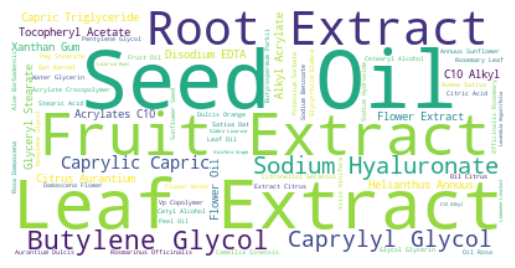

In [61]:
generate_wordcloud(moist)

Đặc trưng chung

* Thành phần chiếm ưu thế là chiết xuất tự nhiên: từ lá, rễ, trái cây, hạt.

* Kết hợp các chất giữ ẩm mạnh như hyaluronate và glycol.

* Hướng đến làm dịu, dưỡng ẩm và chống lão hóa.

* Có sự hiện diện của các chất ổn định và chất hỗ trợ thẩm thấu.


=> Biểu đồ WordCloud cho thấy rằng nhóm Moisturizer ưu tiên các thành phần tự nhiên, an toàn và hiệu quả cao trong dưỡng ẩm. Các chất như Sodium Hyaluronate và Butylene Glycol xuất hiện thường xuyên, khẳng định vai trò thiết yếu trong việc giữ nước và dưỡng sâu cho làn da. Đồng thời, các chiết xuất thực vật hỗ trợ phục hồi và nuôi dưỡng da một cách nhẹ dịu.

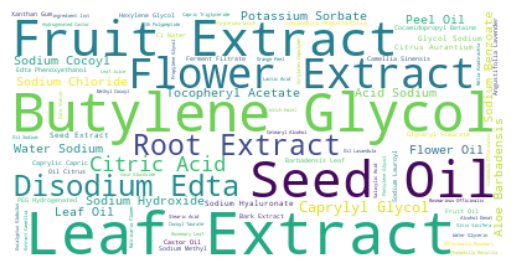

In [62]:
generate_wordcloud(cleanse)

Sữa rửa mặt có sự kết hợp giữa chất làm sạch và chiết xuất thiên nhiên → giúp làm sạch nhẹ nhàng mà không gây khô da.

Các thành phần điều chỉnh pH như Citric Acid, Disodium EDTA khá nổi bật → phù hợp với vai trò cân bằng da sau khi rửa mặt.

Sự hiện diện của chiết xuất lá, trái cây, rễ cây cho thấy sản phẩm cũng hướng đến sự dịu nhẹ và lành tính.


=> Các sản phẩm Cleanser ngày càng ưu tiên chiết xuất tự nhiên kết hợp với hoạt chất làm sạch dịu nhẹ để đảm bảo da được làm sạch nhưng không bị mất đi lớp màng bảo vệ tự nhiên. Những thành phần như Leaf Extract, Butylene Glycol và Citric Acid đóng vai trò trung tâm, cho thấy xu hướng dịu nhẹ – lành tính – hiệu quả trong công thức hiện đại.

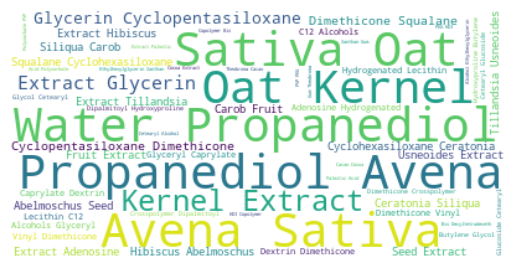

In [63]:
generate_wordcloud(mask)

Đặc điểm công thức nhóm mặt nạ
* Tập trung cao vào thành phần làm dịu, giữ ẩm và phục hồi da.

* Sử dụng nhiều chiết xuất thiên nhiên như yến mạch (Oat), hoa dâm bụt (Hibiscus) để bổ sung dưỡng chất và làm mềm da.

* Kết hợp với silicone và humectants (như Glycerin, Propanediol) để tăng hiệu quả cấp ẩm và tạo cảm giác dễ chịu sau khi sử dụng.

* Thành phần như Squalane cho thấy có tính năng chống lão hóa nhẹ và bảo vệ hàng rào da.

=> Các sản phẩm mặt nạ thường được thiết kế để bổ sung dưỡng chất mạnh mẽ nhưng vẫn nhẹ nhàng với da, thể hiện qua sự hiện diện của những thành phần nổi bật như Avena Sativa, Propanediol, Glycerin, Squalane. Đây là một công thức lý tưởng cho da cần phục hồi nhanh hoặc dưỡng sâu trong thời gian ngắn.

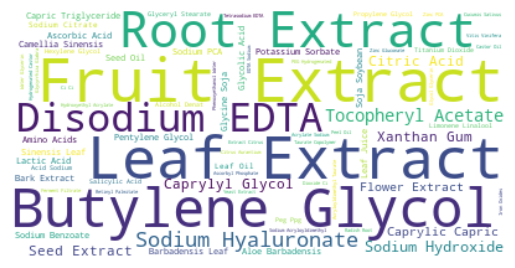

In [64]:
generate_wordcloud(treat)

Đặc điểm công thức của sản phẩm Treatment
* Tập trung vào chiết xuất thiên nhiên đa dạng từ lá, rễ, trái cây – điều này thể hiện chiến lược kết hợp giữa hoạt chất mạnh và yếu tố làm dịu/thảo dược.

* Sự hiện diện của Sodium Hyaluronate và Butylene Glycol cho thấy công thức được tối ưu hóa để vừa điều trị vừa cấp ẩm tốt.

* Các chất như Disodium EDTA, Citric Acid, Sodium Hydroxide cho thấy công thức ổn định, được kiểm soát pH và có tính tương thích da cao.

* Có cả thành phần hỗ trợ phục hồi như Tocopheryl Acetate (Vitamin E) và Glycolic Acid – gợi ý về khả năng tái tạo tế bào, chống lão hóa.

=> Treatment tập trung vào tác động sâu đến vấn đề da như mụn, thâm, lão hóa… với sự góp mặt của nhiều thành phần hoạt tính sinh học và dưỡng chất tự nhiên.

<b> Cả 4 nhóm đều có điểm chung là chuộng thành phần tự nhiên như fruit/leaf/root extract. Nhưng mỗi nhóm lại có đặc trưng riêng tùy theo mục đích sử dụng.</b>

# Huấn luyện mô hình

x: là tập dữ liệu đầu vào – chứa thông tin về thành phần sản phẩm (Ingredients).

y: là nhãn đầu ra – chính là loại sản phẩm (Category).

In [65]:
x=df.Ingredients
y=df.Category

In [66]:
# Chia tệp để huấn luyện
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
# Danh sách tên nhãn
categories=['Moisturizer','Cleanser','Face Mask','Treatment']

Category
Cleanser       4117
Moisturizer    2560
Treatment      1948
Face Mask        24
Name: count, dtype: int64


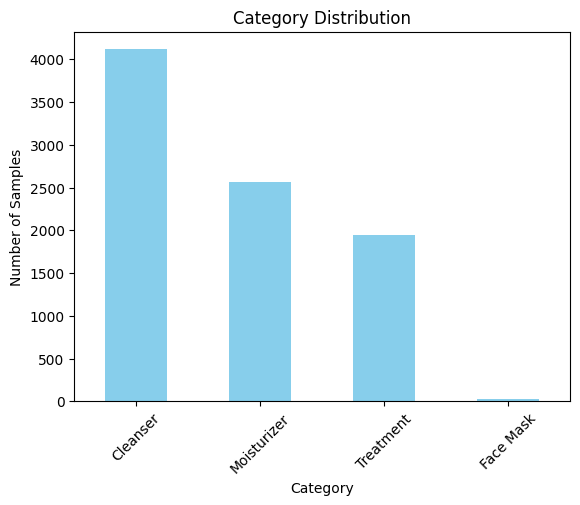

In [68]:
category_stats = df['Category'].value_counts()
print(category_stats)
category_stats.plot(kind='bar', color='skyblue', rot=45)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Samples')
plt.show()

## Naive Bayes

Xây dựng pipeline xử lý ngôn ngữ và huấn luyện mô hình, gồm 3 bước:

1. CountVectorizer(): biến đổi văn bản thành ma trận đếm số lần xuất hiện từ (Bag of Words).

2. TfidfTransformer(): chuẩn hóa bằng TF-IDF để giảm trọng số những từ quá phổ biến.

3. MultinomialNB(): thuật toán Naive Bayes để phân loại văn bản.

Pipeline trong sklearn là một chuỗi các bước xử lý dữ liệu và huấn luyện mô hình được kết nối lại với nhau – giống như một dây chuyền sản xuất tự động.

(Pipeline giống như một dây chuyền tự động giúp em gộp các bước xử lý dữ liệu và huấn luyện mô hình lại với nhau. Trong bài, em dùng Pipeline để lần lượt đếm từ, tính TF-IDF và huấn luyện mô hình Naive Bayes, nhờ vậy mã gọn hơn, tránh lỗi, và dễ đánh giá hiệu suất.)

In [69]:
nb=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])

Huấn luyện mô hình với dữ liệu training
Huấn luyên mô hình nb với xtrain( thành phần), ytrain(loại)

In [70]:
nb.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [71]:
# Dự đoán nhãn loại sản phẩm từ dữ liệu Ingredients chưa biết trong xtest.
y_pred=nb.predict(xtest)

In [72]:
print('accuracy %s' %accuracy_score(y_pred,ytest))
# in độ chính xác (% mẫu dự đoán so với mẫu kiểm tra)

accuracy 0.9618497109826589


In [73]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

 Moisturizer       0.96      1.00      0.98       818
    Cleanser       0.00      0.00      0.00         7
   Face Mask       0.98      0.96      0.97       517
   Treatment       0.95      0.91      0.93       388

    accuracy                           0.96      1730
   macro avg       0.72      0.72      0.72      1730
weighted avg       0.96      0.96      0.96      1730



=> Mô hình đạt accuracy cao (97%) và hoạt động tốt với 3 nhóm chính: Moisturizer, Face Mask, và Treatment. Tuy nhiên, nhóm Cleanser có rất ít dữ liệu (9 mẫu), nên precision và recall đều bằng 0 – mô hình không nhận diện được.

(Dùng mô hình Naive Bayes để phân loại loại mỹ phẩm dựa vào thành phần.

Quy trình gồm: chuyển thành phần thành vector số (dùng CountVectorizer + TF-IDF), sau đó đưa vào mô hình Naive Bayes.

Chia dữ liệu thành 75% huấn luyện, 25% kiểm tra. Cuối cùng, đo độ chính xác và in ra báo cáo để xem mô hình phân biệt tốt từng nhóm ra sao.)

## Hồi quy tuyến tính

In [74]:
# logreg=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',LogisticRegression(n_jobs=1,C=1e5))])
logreg=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced'))])


In [75]:
logreg.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight='balanced',
                                    n_jobs=1))])

In [76]:
y_pred=logreg.predict(xtest)

In [77]:
print('accuracy %s' %accuracy_score(y_pred,ytest))

accuracy 0.9791907514450867


In [78]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

 Moisturizer       1.00      0.96      0.98       818
    Cleanser       1.00      1.00      1.00         7
   Face Mask       0.97      0.99      0.98       517
   Treatment       0.95      1.00      0.98       388

    accuracy                           0.98      1730
   macro avg       0.98      0.99      0.98      1730
weighted avg       0.98      0.98      0.98      1730



Mô hình đạt độ chính xác 98%, và F1-score rất cao ở tất cả các nhãn, ví dụ Moisturizer là 0.98, trong đó Cleanser phân loại hoàn toàn chính xác dù chỉ có 9 mẫu. Điều này cho thấy mô hình phân loại gần như hoàn hảo với các loại sản phẩm mỹ phẩm.

## SGDClassifier

In [79]:
sgd=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),
              ('clf',SGDClassifier(loss='hinge',penalty='l2',alpha=1e-3,random_state=42,max_iter=5))
            ])


In [80]:
sgd.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42))])

In [81]:
y_pred=sgd.predict(xtest)

In [82]:
print('accuracy %s' %accuracy_score(y_pred,ytest))

accuracy 0.9739884393063584


In [83]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

 Moisturizer       0.98      0.97      0.98       818
    Cleanser       1.00      1.00      1.00         7
   Face Mask       0.96      0.99      0.97       517
   Treatment       0.98      0.95      0.96       388

    accuracy                           0.97      1730
   macro avg       0.98      0.98      0.98      1730
weighted avg       0.97      0.97      0.97      1730



In [102]:
# print("Số mẫu huấn luyện:", len(xtrain1))
# print("Số mẫu kiểm tra:", len(xtest1))
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_predictions(ytest1, y_pred1)
df['Good_Stuff'].value_counts(normalize=True)
df['Good_Stuff'].value_counts()




Good_Stuff
1    5356
0    3293
Name: count, dtype: int64

In [86]:
x1=df.Ingredients

In [87]:
y1=df.Good_Stuff

In [88]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Pipeline với CountVectorizer + TFIDF + RandomForest
rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# Huấn luyện mô hình
rf.fit(xtrain1, ytrain1)

# Dự đoán
y_pred_rf = rf.predict(xtest1)

# Đánh giá mô hình
from sklearn.metrics import classification_report, accuracy_score

print("🎯 Random Forest Accuracy:", accuracy_score(ytest1, y_pred_rf))
print("📋 Classification Report:")
print(classification_report(ytest1, y_pred_rf, target_names=['1', '0']))


🎯 Random Forest Accuracy: 0.5647398843930636
📋 Classification Report:
              precision    recall  f1-score   support

           1       0.46      0.53      0.49       682
           0       0.66      0.59      0.62      1048

    accuracy                           0.56      1730
   macro avg       0.56      0.56      0.55      1730
weighted avg       0.58      0.56      0.57      1730



In [90]:
cat=['1','0']

In [91]:
nb=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])

In [92]:
nb.fit(xtrain1,ytrain1)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [93]:
y_pred=nb.predict(xtest1)

In [94]:
print('accuracy %s' %accuracy_score(y_pred,ytest1))

accuracy 0.5965317919075145


In [95]:
print(classification_report(ytest1,y_pred,target_names=cat))

              precision    recall  f1-score   support

           1       0.48      0.26      0.34       682
           0       0.63      0.82      0.71      1048

    accuracy                           0.60      1730
   macro avg       0.55      0.54      0.52      1730
weighted avg       0.57      0.60      0.56      1730



In [96]:
# logreg=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',LogisticRegression(n_jobs=1,C=1e5))])
logreg=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced'))])


In [97]:
logreg.fit(xtrain1,ytrain1)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight='balanced',
                                    n_jobs=1))])

In [98]:
y_pred1=logreg.predict(xtest1)

In [101]:
print('accuracy %s' %accuracy_score(y_pred1,ytest1))

accuracy 0.5578034682080925


In [ ]:
print(classification_report(ytest1,y_pred1))

              precision    recall  f1-score   support

           0       0.45      0.52      0.48       682
           1       0.65      0.58      0.61      1048

    accuracy                           0.56      1730
   macro avg       0.55      0.55      0.55      1730
weighted avg       0.57      0.56      0.56      1730



In [ ]:
sgd=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',SGDClassifier(loss='hinge',penalty='l2',alpha=1e-3,random_state=42,max_iter=5))])

In [ ]:
sgd.fit(xtrain1,ytrain1)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42))])

In [ ]:
y_pred1=sgd.predict(xtest1)

In [ ]:
print('accuracy %s' %accuracy_score(y_pred1,ytest1))

accuracy 0.6173410404624278


In [ ]:
print(classification_report(ytest1,y_pred1,target_names=cat))

              precision    recall  f1-score   support

           1       0.68      0.06      0.10       682
           0       0.62      0.98      0.76      1048

    accuracy                           0.62      1730
   macro avg       0.65      0.52      0.43      1730
weighted avg       0.64      0.62      0.50      1730



In [ ]:
def recommend_products_by_user_features(skintone,eyecolor,skintype,haircolor):
    ddf=df[(df['Skin_Tone']==skintone) & (df['Eye_Color']==eyecolor) &(df['Skin_Type']==skintype) & (df['Hair_Color']==haircolor)]
    recommendations=ddf[(ddf['Rating_Stars'].notnull())][['Rating_Stars','Product_Url','Product']]
    recommendations=recommendations.sort_values('Rating_Stars',ascending=False).head(10)
    print('Based on your features, these are the top products for you')
    return recommendations

In [ ]:
skintone=str(input('Enter Skin Tone'))
eyecolor=str(input('Enter Eye Color'))
skintype=str(input('Enter Skin Type'))
haircolor=str(input('Enter Hair Color'))

In [ ]:
recommend_products_by_user_features(skintone,eyecolor,skintype,haircolor)

Based on your features, these are the top products for you


Empty DataFrame
Columns: [Rating_Stars, Product_Url, Product]
Index: []

In [ ]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

In [ ]:
df_cont=df[['Product','Product_id','Ingredients','Product_Url','Ing_Tfidf','Rating']]

In [ ]:
df_cont.head()

Product  Product_id  \
0  Superfood Antioxidant Cleanser         157   
1  Superfood Antioxidant Cleanser         157   
2  Superfood Antioxidant Cleanser         157   
3  Superfood Antioxidant Cleanser         157   
4  Superfood Antioxidant Cleanser         157   

                                         Ingredients  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   

                                         Product_Url  \
0  https://www.sephora.com/product/kale-spinach-g...   
1  https://www.sephora.com/product/kale-spinach-g...   
2  https://www.sephora.com/product/kale-spinach-g...   
3  https://www.sephora.com/product/kale-spinach-g...   
4  https://www.sephora.com/product/kale-spinach-g...   

                                           Ing_Tfidf  Rating  
0  sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
1  sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
2  sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
3  sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
4  sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4

In [ ]:
df_cont.drop_duplicates(inplace=True)

In [ ]:
tf=TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0.01,stop_words='english')

In [ ]:
tfidf_matrix=tf.fit_transform(df_cont['Ingredients'])

In [ ]:
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [ ]:
df_cont.head()

Product  Product_id  \
0           Superfood Antioxidant Cleanser         157   
48           Cleansing & Exfoliating Wipes          65   
96             Purity Made Simple Cleanser         210   
144            Beste™ No. 9 Jelly Cleanser          35   
192  The Rice Polish Foaming Enzyme Powder         196   

                                           Ingredients  \
0    Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
48   Water, Caprylic/Capric Triglyceride, Fragrance...   
96   Water, Sodium Lauroamphoacetate, Sodium Tridec...   
144  Water, Sodium Lauroyl Methyl Isethionate, Glyc...   
192  Microcrystalline Cellulose, Oryza Sativa (Rice...   

                                           Product_Url  \
0    https://www.sephora.com/product/kale-spinach-g...   
48   https://www.sephora.com/product/cleansing-exfo...   
96   https://www.sephora.com/product/purity-made-si...   
144  https://www.sephora.com/product/beste-no-9-jel...   
192  https://www.sephora.com/product/polished-rice-...   

                                             Ing_Tfidf  Rating  
0    sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
48   caprylic, capric, triglyceride, fragrance, phe...     4.5  
96   sodium, lauroamphoacetate, sodium, trideceth, ...     4.5  
144  sodium, lauroyl, methyl, isethionate, glycerin...     4.1  
192  microcrystalline, cellulose, oryza, sativa, ri...     4.4

In [ ]:
df_cont.reset_index(drop=True)

Product  Product_id  \
0                       Superfood Antioxidant Cleanser         157   
1                        Cleansing & Exfoliating Wipes          65   
2                          Purity Made Simple Cleanser         210   
3                          Beste™ No. 9 Jelly Cleanser          35   
4                The Rice Polish Foaming Enzyme Powder         196   
..                                                 ...         ...   
310      Midnight Secret Late Night Recovery Treatment         173   
311                      Post-Acne Spot Lightening Gel         198   
312    Hydro-Plumping Re-Texturizing Serum Concentrate         150   
313                 The Microdelivery Resurfacing Peel         266   
314  Ferulic + Retinol Wrinkle Recovery Overnight S...         124   

                                           Ingredients  \
0    Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
1    Water, Caprylic/Capric Triglyceride, Fragrance...   
2    Water, Sodium Lauroamphoacetate, Sodium Tridec...   
3    Water, Sodium Lauroyl Methyl Isethionate, Glyc...   
4    Microcrystalline Cellulose, Oryza Sativa (Rice...   
..                                                 ...   
310                        Visit the Guerlain boutique   
311  Water, Alcohol Denat., Glycolic Acid, Butylene...   
312  Water, Glycerin, Dimethicone, Propanediol, Dim...   
313  The Microdelivery Peel Step I:\r\r\nPeg-6, Sod...   
314  Water, DiCaprylyl Carbonate, Niacinamide, Cety...   

                                           Product_Url  \
0    https://www.sephora.com/product/kale-spinach-g...   
1    https://www.sephora.com/product/cleansing-exfo...   
2    https://www.sephora.com/product/purity-made-si...   
3    https://www.sephora.com/product/beste-no-9-jel...   
4    https://www.sephora.com/product/polished-rice-...   
..                                                 ...   
310  https://www.sephora.com/product/midnight-secre...   
311  https://www.sephora.com/product/post-acne-spot...   
312  https://www.sephora.com/product/hydro-plumping...   
313  https://www.sephora.com/product/the-microdeliv...   
314  https://www.sephora.com/product/ferulic-retino...   

                                             Ing_Tfidf  Rating  
0    sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
1    caprylic, capric, triglyceride, fragrance, phe...     4.5  
2    sodium, lauroamphoacetate, sodium, trideceth, ...     4.5  
3    sodium, lauroyl, methyl, isethionate, glycerin...     4.1  
4    microcrystalline, cellulose, oryza, sativa, ri...     4.4  
..                                                 ...     ...  
310                          visit, guerlain, boutique     4.2  
311  alcohol, denat, glycolic, acid, butylene, glyc...     3.7  
312  glycerin, dimethicone, propanediol, dimethicon...     4.7  
313  microdelivery, peel, step, peg, sodium, bicarb...     4.7  
314  dicaprylyl, carbonate, niacinamide, cetyl, alc...     4.4  

[315 rows x 6 columns]

In [ ]:
titles=df_cont[['Product','Ing_Tfidf','Rating']]

In [ ]:
titles.head()

Product  \
0           Superfood Antioxidant Cleanser   
48           Cleansing & Exfoliating Wipes   
96             Purity Made Simple Cleanser   
144            Beste™ No. 9 Jelly Cleanser   
192  The Rice Polish Foaming Enzyme Powder   

                                             Ing_Tfidf  Rating  
0    sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
48   caprylic, capric, triglyceride, fragrance, phe...     4.5  
96   sodium, lauroamphoacetate, sodium, trideceth, ...     4.5  
144  sodium, lauroyl, methyl, isethionate, glycerin...     4.1  
192  microcrystalline, cellulose, oryza, sativa, ri...     4.4

In [ ]:
indices=pd.Series(df_cont.index,index=df_cont['Product'])

In [ ]:
indices

Product
Superfood Antioxidant Cleanser                           0
Cleansing & Exfoliating Wipes                           48
Purity Made Simple Cleanser                             96
Beste™ No. 9 Jelly Cleanser                            144
The Rice Polish Foaming Enzyme Powder                  192
                                                      ... 
Midnight Secret Late Night Recovery Treatment         8583
Post-Acne Spot Lightening Gel                         8607
Hydro-Plumping Re-Texturizing Serum Concentrate       8631
The Microdelivery Resurfacing Peel                    8655
Ferulic + Retinol Wrinkle Recovery Overnight Serum    8679
Length: 315, dtype: int64

In [ ]:
indices['Superfood Antioxidant Cleanser']

np.int64(0)

In [ ]:
def content_recommendation(product):
    idx=indices[product]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    sim_scores=sim_scores[1:11]
    product_indices=[i[0] for i in sim_scores]
    return titles.iloc[product_indices]
    

In [ ]:
content_recommendation('The Rice Polish Foaming Enzyme Powder')

Product  \
8012             Water Drench Hyaluronic Cloud Serum   
1440             Water Drench Hyaluronic Cloud Cream   
2040                      Nutrient-Charged Water Gel   
5616                          Problem Solution Toner   
4008                        Micellar Cleansing Water   
4536                       Deep Cleansing Exfoliator   
6764  Skin Rescue Acne Clearing Pads with White Clay   
1464              The Essence Plumping Skin Softener   
1080                The True Cream Moisturizing Bomb   
1512         Goodnight Glow Retin-ALT Sleeping Crème   

                                              Ing_Tfidf  Rating  
8012  saccharide, isomerate, sodium, hyaluronate, so...     4.2  
1440  glycerin, cyclopentasiloxane, dipropylene, gly...     4.4  
2040  dimethicone, glycerin, propanediol, saccharide...     4.6  
5616  dipropylene, glycol, butylene, glycol, hexaned...     4.3  
4008  glycerin, poloxamer, vitis, vinifera, grape, f...     4.0  
4536  polylactic, acid, hexyldecyl, stearate, glycer...     4.6  
6764  polysorbate, phenoxyethanol, sodium, hydroxide...     4.2  
1464  saccharomyces, camellia, sinensis, leaf, clado...     4.4  
1080  glycerin, cyclohexasiloxane, hydrogenated, pol...     4.6  
1512  glycerin, vitis, vinifera, grape, seed, oil, c...     4.3

## Project Completed

## Congratulations